<a href="https://colab.research.google.com/github/philjaycee/SBC_Final/blob/main/sbc_final_phil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df3 = pd.read_csv('Data_Negara_HELP.csv')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df3.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df1 = df3[['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']].fillna(0.0).astype(int)
df2 = df3['Negara']
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Kematian_anak     167 non-null    int64
 1   Ekspor            167 non-null    int64
 2   Kesehatan         167 non-null    int64
 3   Impor             167 non-null    int64
 4   Pendapatan        167 non-null    int64
 5   Inflasi           167 non-null    int64
 6   Harapan_hidup     167 non-null    int64
 7   Jumlah_fertiliti  167 non-null    int64
 8   GDPperkapita      167 non-null    int64
dtypes: int64(9)
memory usage: 11.9 KB


In [ ]:
df1.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.886228,40.670659,6.311377,46.449102,17144.688623,7.329341,70.107784,2.449102,12964.155689
std,40.426405,27.476264,2.791778,24.254836,19278.067698,10.555900,8.891603,1.554855,18328.704809
min,2.000000,0.000000,1.000000,0.000000,609.000000,-4.000000,32.000000,1.000000,231.000000
25%,7.500000,23.000000,4.000000,30.000000,3355.000000,1.000000,65.000000,1.000000,1330.000000
50%,19.000000,35.000000,6.000000,43.000000,9960.000000,5.000000,73.000000,2.000000,4660.000000
75%,62.000000,51.000000,8.000000,58.000000,22800.000000,10.000000,76.000000,3.000000,14050.000000
max,208.000000,200.000000,17.000000,174.000000,125000.000000,104.000000,82.000000,7.000000,105000.000000


In [ ]:
def removeOutliers(df1, col):
    Q3 = np.quantile(df1[col], 0.75)
    Q1 = np.quantile(df1[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in df1[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = df1.loc[df1[col].isin(outlier_free_list)]


for i in df1.columns:
    removeOutliers(df1, i)

IQR value for column Kematian_anak is: 54.5
IQR value for column Ekspor is: 28.0
IQR value for column Kesehatan is: 4.0
IQR value for column Impor is: 28.0
IQR value for column Pendapatan is: 19445.0
IQR value for column Inflasi is: 9.0
IQR value for column Harapan_hidup is: 11.0
IQR value for column Jumlah_fertiliti is: 2.0
IQR value for column GDPperkapita is: 12720.0


In [ ]:
df7 = pd.concat([df1, df2], axis=1, join='inner')
df7

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Negara
0,90,10,7,44,1610,9,56,5,553,Afghanistan
1,16,28,6,48,9930,4,76,1,4090,Albania
2,27,38,4,31,12900,16,76,2,4460,Algeria
3,119,62,2,42,5900,22,60,6,3530,Angola
4,10,45,6,58,19100,1,76,2,12200,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,29,46,5,52,2950,2,63,3,2970,Vanuatu
163,17,28,4,17,16500,45,75,2,13500,Venezuela
164,23,72,6,80,4490,12,73,1,1310,Vietnam
165,56,30,5,34,4480,23,67,4,1310,Yemen


In [ ]:
df7.info

<bound method DataFrame.info of      Kematian_anak  Ekspor  ...  GDPperkapita               Negara
0               90      10  ...           553          Afghanistan
1               16      28  ...          4090              Albania
2               27      38  ...          4460              Algeria
3              119      62  ...          3530               Angola
4               10      45  ...         12200  Antigua and Barbuda
..             ...     ...  ...           ...                  ...
162             29      46  ...          2970              Vanuatu
163             17      28  ...         13500            Venezuela
164             23      72  ...          1310              Vietnam
165             56      30  ...          1310                Yemen
166             83      37  ...          1460               Zambia

[167 rows x 10 columns]>

In [ ]:
df7.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.886228,40.670659,6.311377,46.449102,17144.688623,7.329341,70.107784,2.449102,12964.155689
std,40.426405,27.476264,2.791778,24.254836,19278.067698,10.555900,8.891603,1.554855,18328.704809
min,2.000000,0.000000,1.000000,0.000000,609.000000,-4.000000,32.000000,1.000000,231.000000
25%,7.500000,23.000000,4.000000,30.000000,3355.000000,1.000000,65.000000,1.000000,1330.000000
50%,19.000000,35.000000,6.000000,43.000000,9960.000000,5.000000,73.000000,2.000000,4660.000000
75%,62.000000,51.000000,8.000000,58.000000,22800.000000,10.000000,76.000000,3.000000,14050.000000
max,208.000000,200.000000,17.000000,174.000000,125000.000000,104.000000,82.000000,7.000000,105000.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
data = df1
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

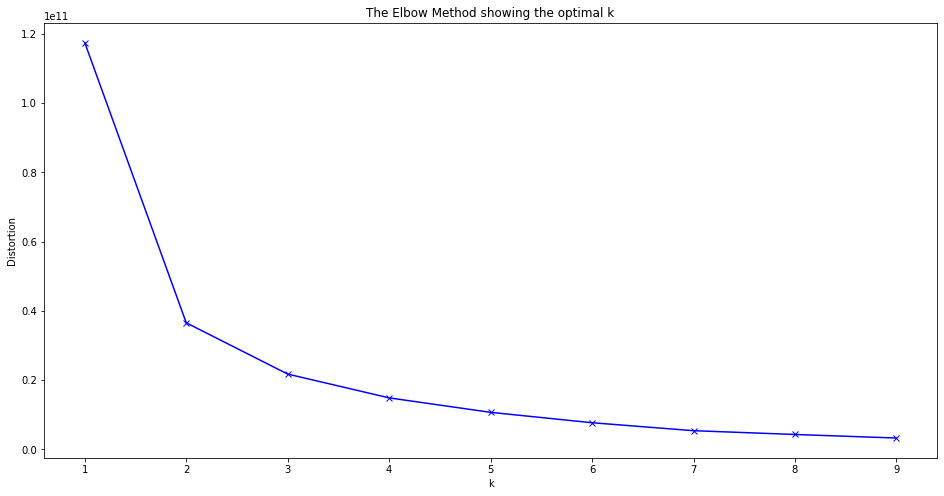

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_cluster = km.fit_predict(df7[['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])
y_cluster

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df7['cluter'] = y_cluster
df7.head(50)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Negara,cluter
0,90,10,7,44,1610,9,56,5,553,Afghanistan,0
1,16,28,6,48,9930,4,76,1,4090,Albania,0
2,27,38,4,31,12900,16,76,2,4460,Algeria,0
3,119,62,2,42,5900,22,60,6,3530,Angola,0
4,10,45,6,58,19100,1,76,2,12200,Antigua and Barbuda,0
5,14,18,8,16,18700,20,75,2,10300,Argentina,0
6,18,20,4,45,6700,7,73,1,3220,Armenia,0
7,4,19,8,20,41400,1,82,1,51900,Australia,2
8,4,51,11,47,43200,0,80,1,46900,Austria,2
9,39,54,5,20,16000,13,69,1,5840,Azerbaijan,0


No handles with labels found to put in legend.


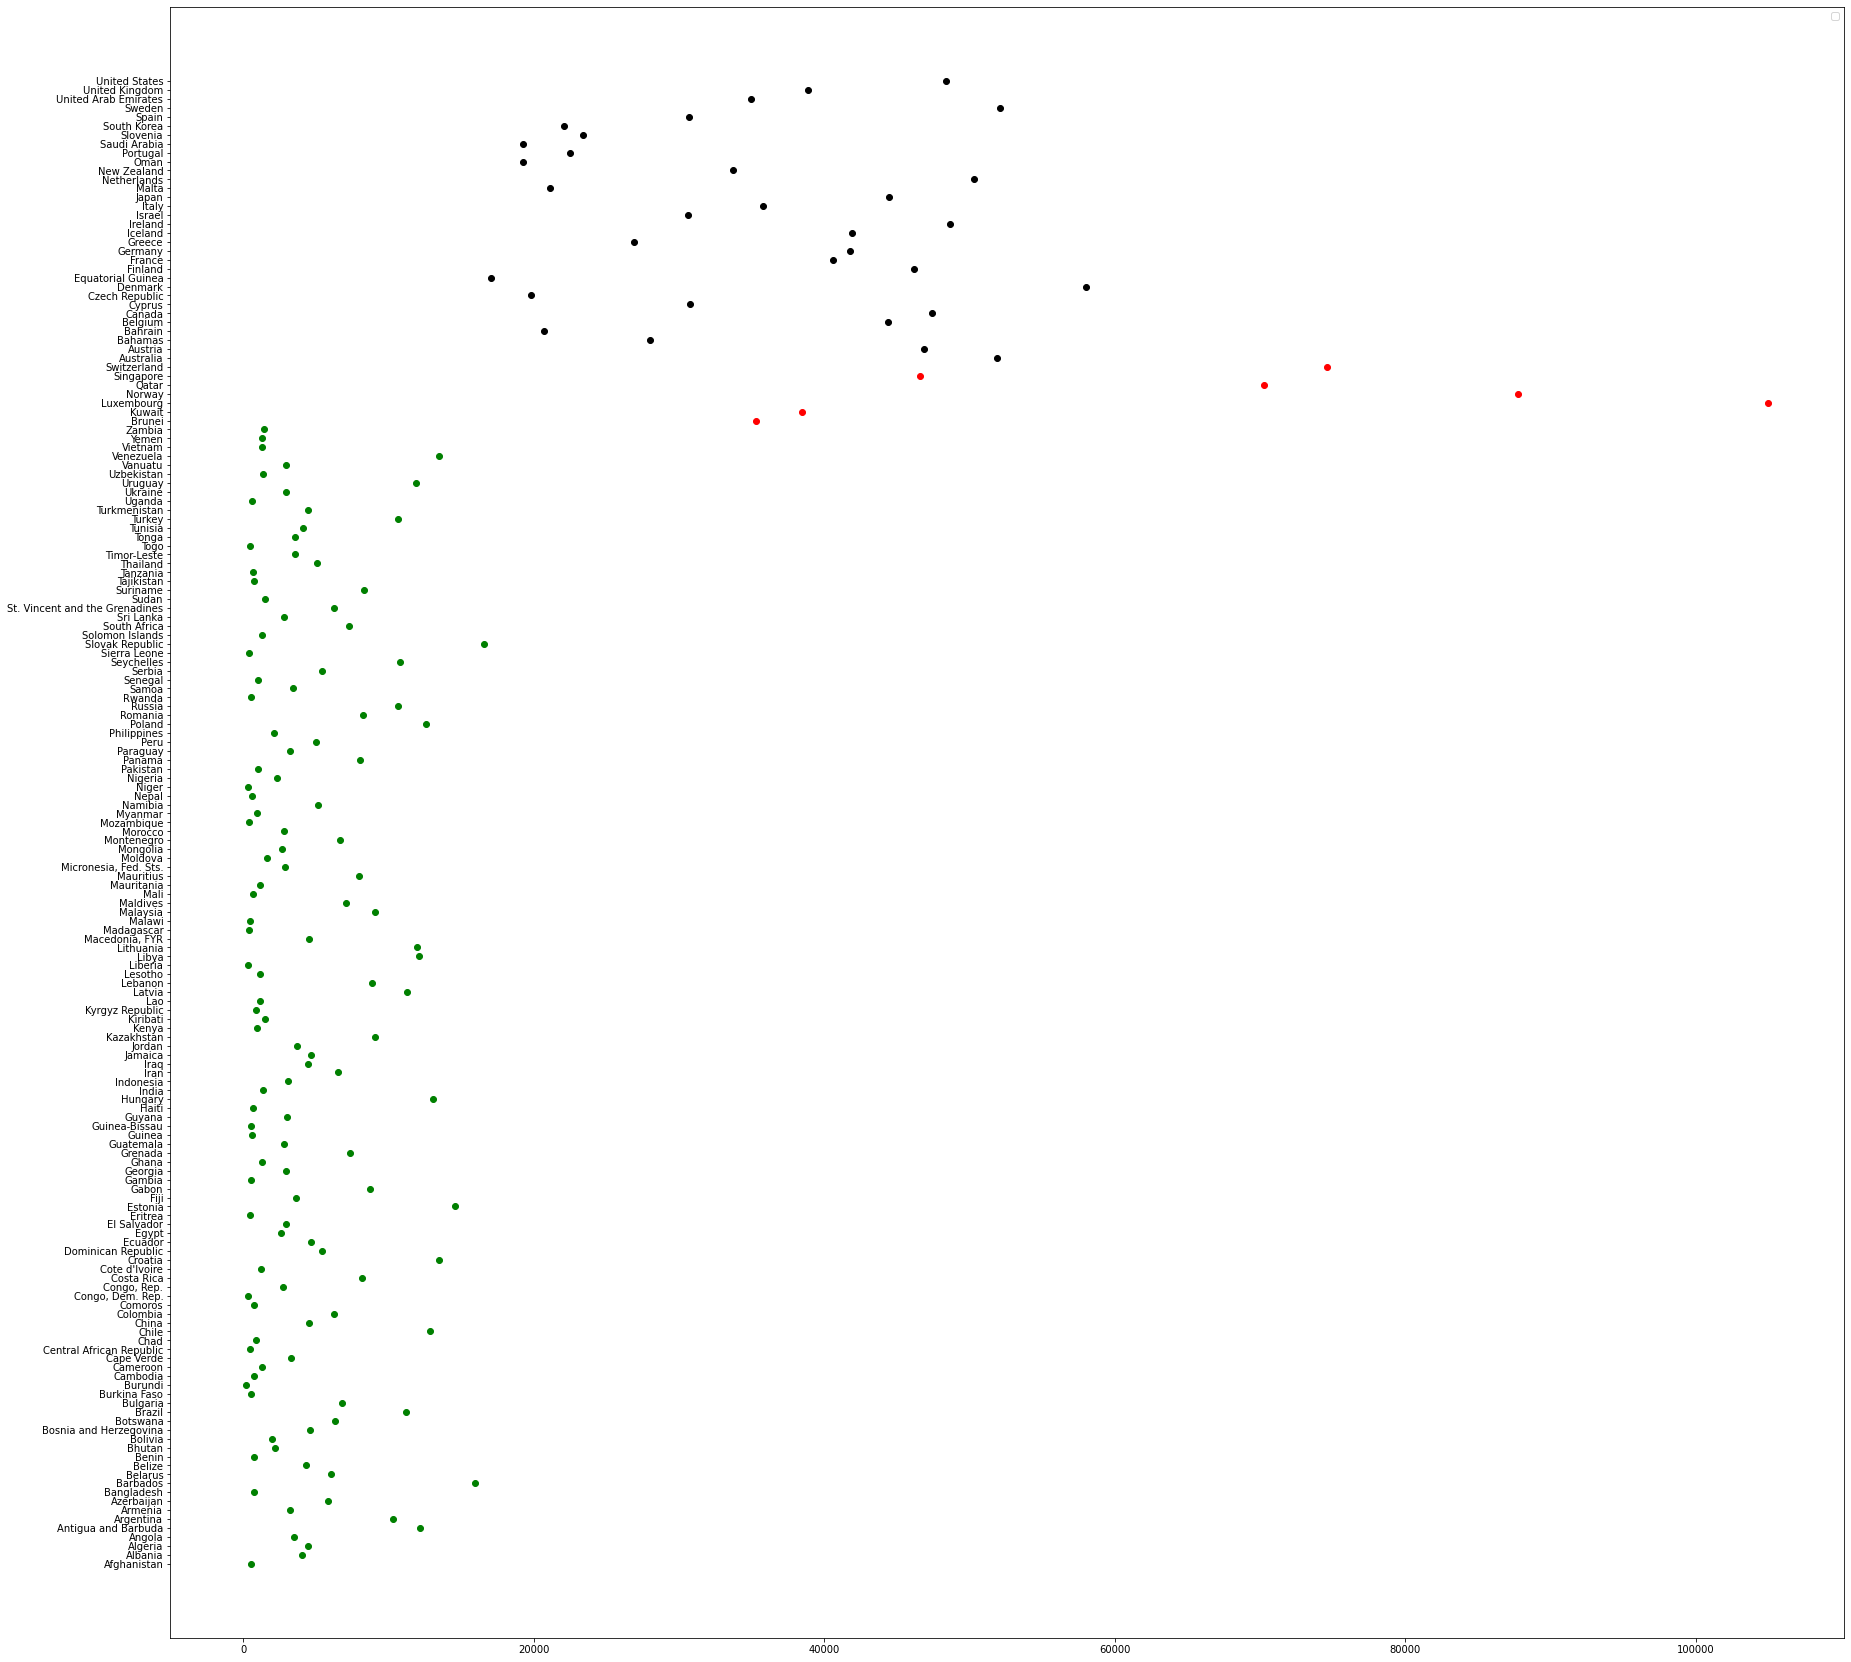

In [ ]:
df_1 = df7[df7.cluter ==0]
df_2 = df7[df7.cluter ==1]
df_3 = df7[df7.cluter ==2]
plt.scatter(df_1['GDPperkapita'],df_1['Negara'], color = 'green')
plt.scatter(df_2['GDPperkapita'],df_2['Negara'], color = 'red')
plt.scatter(df_3['GDPperkapita'],df_3['Negara'], color = 'black')
plt.rcParams["figure.figsize"] = (20,20)
plt.legend()

#plt.scatter(df7)

No handles with labels found to put in legend.


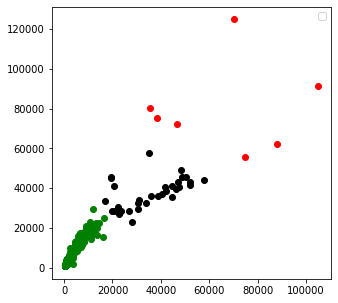

In [ ]:
df_1 = df7[df7.cluter ==0]
df_2 = df7[df7.cluter ==1]
df_3 = df7[df7.cluter ==2]
plt.scatter(df_1['GDPperkapita'],df_1['Pendapatan'], color = 'green')
plt.scatter(df_2['GDPperkapita'],df_2['Pendapatan'], color = 'red')
plt.scatter(df_3['GDPperkapita'],df_3['Pendapatan'], color = 'black')
plt.rcParams["figure.figsize"] = (3,3)
plt.legend()